In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import psycopg2
import pandas as pd
import psycopg2.extras
import seaborn as sns
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "tasin805",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database")
        return self.connection

In [6]:
con = PostgresConnection().getConnection()

successfully connected to database


# Q1: Find the division/district/year/month wise total_sale_price joining fact table and respective dimension table

In [7]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.division, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.store_dim s on s.store_key=t.store_key " \
                "GROUP BY CUBE(s.division) " \
                "ORDER BY s.division "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [8]:
records

[('BARISAL', Decimal('7520343.75')),
 ('CHITTAGONG', Decimal('19763595.00')),
 ('DHAKA', Decimal('40764619.75')),
 ('KHULNA', Decimal('11311610.50')),
 ('RAJSHAHI', Decimal('12099196.00')),
 ('RANGPUR', Decimal('8429836.50')),
 ('SYLHET', Decimal('5512234.25')),
 (None, Decimal('105401435.75'))]

In [9]:
df_q1 = pd.DataFrame(records, columns=['division', 'sales'])
df_q1

,division,sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25
7,None,105401435.75


In [10]:
def changetype(x):
    x['sales']=x['sales'].astype('float64')  

In [11]:
df_q1 =df_q1.drop(7)

In [12]:
df_q1

,division,sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25


In [13]:
changetype(df_q1)

In [14]:
df_q1

,division,sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25


In [15]:
df_q1=df_q1.set_index(['division'])
df_q1

,sales
division,
BARISAL,7520343.75
CHITTAGONG,19763595.00
DHAKA,40764619.75
KHULNA,11311610.50
RAJSHAHI,12099196.00
RANGPUR,8429836.50
SYLHET,5512234.25


<Axes: ylabel='sales'>

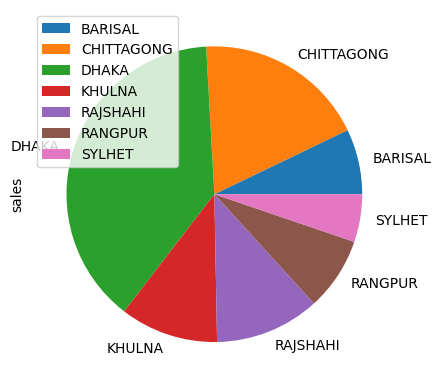

In [16]:
df_q1.plot.pie(y='sales')

<Axes: xlabel='division'>

<Figure size 1000x500 with 0 Axes>

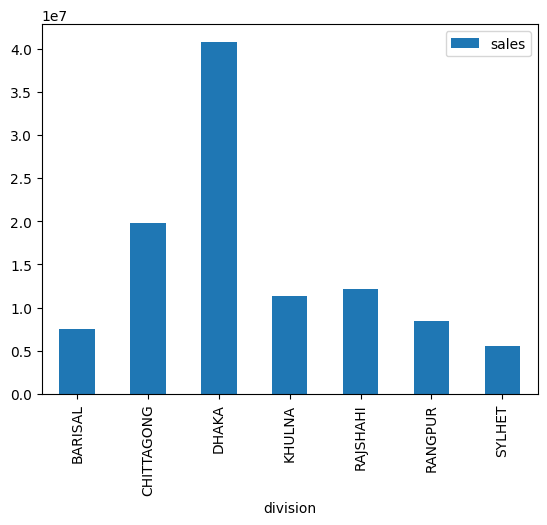

In [17]:
plt.figure(figsize=(10,5))
df_q1.plot.bar(y='sales')

In [18]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.district, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.store_dim s on s.store_key=t.store_key " \
                "GROUP BY CUBE(s.district) " \
                "ORDER BY s.district"
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [19]:
records

[('BAGERHAT', Decimal('1307651.00')),
 ('BANDARBAN', Decimal('995360.75')),
 ('BARGUNA', Decimal('869041.00')),
 ('BARISAL', Decimal('2897237.75')),
 ('BHOLA', Decimal('1012205.75')),
 ('BOGRA', Decimal('1716452.75')),
 ('BRAHMANBARIA', Decimal('1328234.25')),
 ('CHANDPUR', Decimal('1153276.75')),
 ('CHAPAI NABABGANJ', Decimal('739447.50')),
 ('CHITTAGONG', Decimal('7292985.50')),
 ('CHUADANGA', Decimal('563909.75')),
 ('COMILLA', Decimal('2286898.25')),
 ("COX'S BAZAR", Decimal('1188128.75')),
 ('DHAKA', Decimal('23597621.00')),
 ('DINAJPUR', Decimal('1871005.75')),
 ('FARIDPUR', Decimal('1287383.75')),
 ('FENI', Decimal('847873.50')),
 ('GAIBANDHA', Decimal('997077.75')),
 ('GAZIPUR', Decimal('722286.25')),
 ('GOPALGANJ', Decimal('731312.75')),
 ('HABIGANJ', Decimal('1153998.00')),
 ('JAMALPUR', Decimal('1009760.00')),
 ('JESSORE', Decimal('1132590.50')),
 ('JHALOKATI', Decimal('570807.25')),
 ('JHENAIDAH', Decimal('869991.25')),
 ('JOYPURHAT', Decimal('735378.50')),
 ('KHAGRACHHARI'

In [20]:
df_q1 = pd.DataFrame(list(records), columns=['district', 'sales'])
df_q1

,district,sales
0,BAGERHAT,1307651.00
1,BANDARBAN,995360.75
2,BARGUNA,869041.00
3,BARISAL,2897237.75
4,BHOLA,1012205.75
...,...,...
60,SUNAMGANJ,1593774.00
61,SYLHET,1727717.25
62,TANGAIL,1774650.25
63,THAKURGAON,729934.25


In [21]:
def changetype(x):
    x['sales']=x['sales'].astype('float64') 
df_q1 =df_q1.drop(64)
df_q1

,district,sales
0,BAGERHAT,1307651.00
1,BANDARBAN,995360.75
2,BARGUNA,869041.00
3,BARISAL,2897237.75
4,BHOLA,1012205.75
...,...,...
59,SIRAJGANJ,1295100.75
60,SUNAMGANJ,1593774.00
61,SYLHET,1727717.25
62,TANGAIL,1774650.25


In [22]:
changetype(df_q1)
df_q1

,district,sales
0,BAGERHAT,1307651.00
1,BANDARBAN,995360.75
2,BARGUNA,869041.00
3,BARISAL,2897237.75
4,BHOLA,1012205.75
...,...,...
59,SIRAJGANJ,1295100.75
60,SUNAMGANJ,1593774.00
61,SYLHET,1727717.25
62,TANGAIL,1774650.25


In [23]:
#df_q1=df_q1.set_index(['district'])
#df_q1

In [24]:
print(df_q1.columns)

Index(['district', 'sales'], dtype='object')


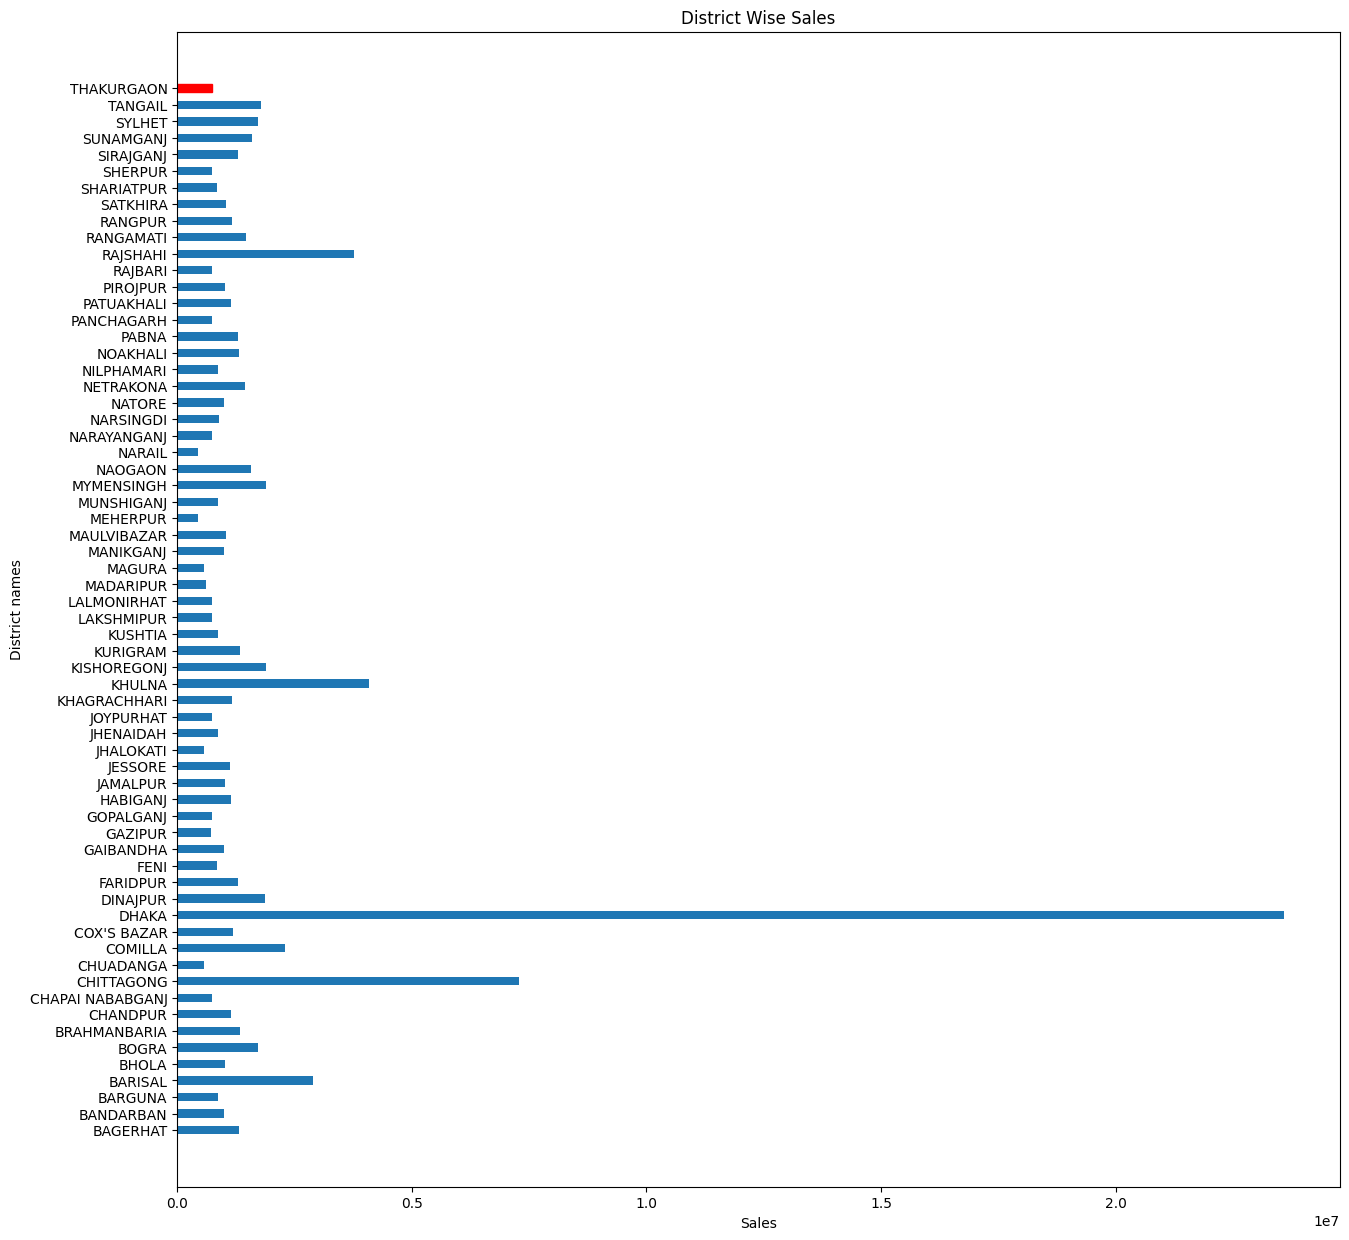

In [25]:
plt.figure(figsize = (15,15))
barlist=plt.barh(df_q1[ 'district' ],df_q1['sales'], height=.5)
barlist[63].set_color('r')
plt.title('District Wise Sales')
plt.xlabel('Sales')
plt.ylabel('District names')
plt.show()

In [26]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.year, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.time_dim s on s.time_key=t.time_key " \
                "GROUP BY CUBE(s.year) " \
                "ORDER BY s.year "
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[(2014, Decimal('14334731.25')),
 (2015, Decimal('15095720.25')),
 (2016, Decimal('14976508.25')),
 (2017, Decimal('15015806.00')),
 (2018, Decimal('15108197.25')),
 (2019, Decimal('14949510.25')),
 (2020, Decimal('15037190.25')),
 (2021, Decimal('883772.25')),
 (None, Decimal('105401435.75'))]

In [27]:
df_q1 = pd.DataFrame(records, columns=['year', 'sales'])
df_q1

,year,sales
0,2014.0,14334731.25
1,2015.0,15095720.25
2,2016.0,14976508.25
3,2017.0,15015806.00
4,2018.0,15108197.25
5,2019.0,14949510.25
6,2020.0,15037190.25
7,2021.0,883772.25
8,NaN,105401435.75


In [28]:
def changetype(x):
    x['sales']=x['sales'].astype('float64') 
df_q1 =df_q1.drop(8)

df_q1

,year,sales
0,2014.0,14334731.25
1,2015.0,15095720.25
2,2016.0,14976508.25
3,2017.0,15015806.00
4,2018.0,15108197.25
5,2019.0,14949510.25
6,2020.0,15037190.25
7,2021.0,883772.25


In [29]:
changetype(df_q1)

df_q1

,year,sales
0,2014.0,14334731.25
1,2015.0,15095720.25
2,2016.0,14976508.25
3,2017.0,15015806.00
4,2018.0,15108197.25
5,2019.0,14949510.25
6,2020.0,15037190.25
7,2021.0,883772.25


Empty DataFrame
Columns: [year, sales]
Index: []


<Axes: title={'center': 'Year Wise Sale'}, xlabel='year', ylabel='sales'>

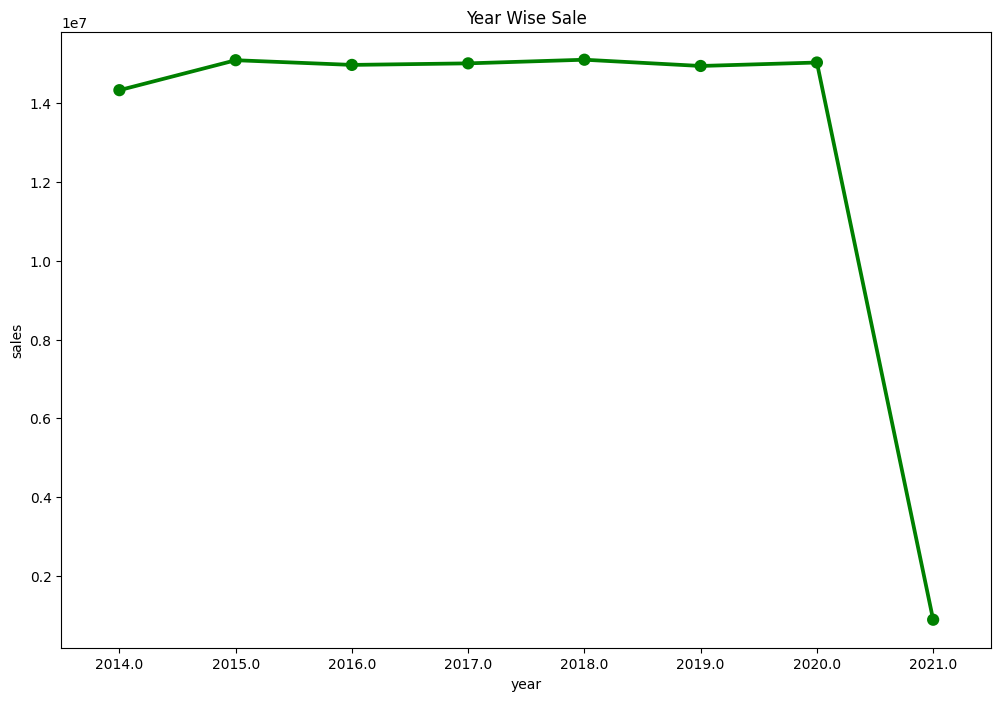

In [30]:
plt.figure(figsize = (12,8))
plt.title('Year Wise Sale')
plt.xlabel('Year')
plt.ylabel('Sales')
t=df_q1.loc[df_q1['year']==2023]
print(t)
sns.pointplot(data=df_q1,x='year' ,y='sales',color='green')

In [31]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.month, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.time_dim s on s.time_key=t.time_key " \
                "GROUP BY CUBE(s.month) " \
                "ORDER BY s.month "
cur.execute(select_stmt)
records = cur.fetchall()
records


successfully connected to database


[(1, Decimal('9042244.00')),
 (2, Decimal('8073877.50')),
 (3, Decimal('8939152.00')),
 (4, Decimal('8504634.75')),
 (5, Decimal('9078002.50')),
 (6, Decimal('8556853.00')),
 (7, Decimal('9046580.00')),
 (8, Decimal('8929475.25')),
 (9, Decimal('8724326.50')),
 (10, Decimal('8902783.75')),
 (11, Decimal('8680026.00')),
 (12, Decimal('8923480.50')),
 (None, Decimal('105401435.75'))]

In [32]:
df_q1 = pd.DataFrame(list(records), columns=['month', 'sales'])
df_q1

,month,sales
0,1.0,9042244.00
1,2.0,8073877.50
2,3.0,8939152.00
3,4.0,8504634.75
4,5.0,9078002.50
5,6.0,8556853.00
6,7.0,9046580.00
7,8.0,8929475.25
8,9.0,8724326.50
9,10.0,8902783.75


In [33]:
def changetype(x):
    x['sales']=x['sales'].astype('float64') 
df_q1 =df_q1.drop(12)

df_q1

,month,sales
0,1.0,9042244.00
1,2.0,8073877.50
2,3.0,8939152.00
3,4.0,8504634.75
4,5.0,9078002.50
5,6.0,8556853.00
6,7.0,9046580.00
7,8.0,8929475.25
8,9.0,8724326.50
9,10.0,8902783.75


In [34]:
changetype(df_q1)

df_q1


,month,sales
0,1.0,9042244.00
1,2.0,8073877.50
2,3.0,8939152.00
3,4.0,8504634.75
4,5.0,9078002.50
5,6.0,8556853.00
6,7.0,9046580.00
7,8.0,8929475.25
8,9.0,8724326.50
9,10.0,8902783.75


In [35]:
month_name= ['January', 'February', 'March','April', 'May', 'June','July','August', 'September','October','November', 'December']
df_q1['month_name']=month_name

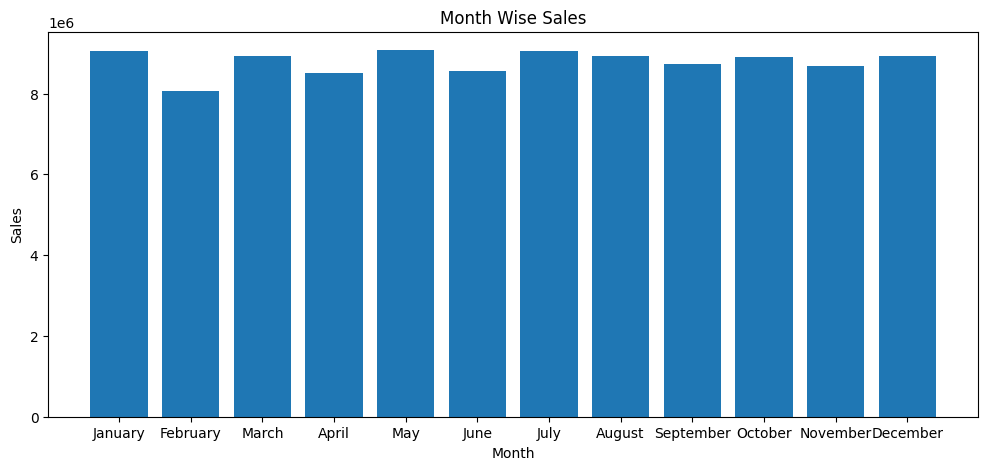

In [36]:
plt.figure(figsize = (12,5))
plt.bar(df_q1['month_name'],df_q1['sales'])
plt.title('Month Wise Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

# Q2: Find the customer/bank/transaction(cash/online) wise total_sale_price joining fact table and respective dimension table 

In [37]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.name, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.customer_dim s on s.customer_key=t.customer_key " \
                "GROUP BY CUBE(s.name) " \
                "ORDER BY s.name "
cur.execute(select_stmt)
records = cur.fetchall()



records

successfully connected to database


[('-', Decimal('20643.50')),
 ('????', Decimal('21142.50')),
 ('?????', Decimal('21085.50')),
 ('????? ??', Decimal('12288.00')),
 ('??????', Decimal('11010.00')),
 ('aafreen fatima', Decimal('11174.75')),
 ('aafrin', Decimal('22136.75')),
 ('aafrin @ dolly', Decimal('23529.75')),
 ('aaftaab husan', Decimal('9682.00')),
 ('aakanksha', Decimal('11469.00')),
 ('aaliya', Decimal('21663.25')),
 ('aamina', Decimal('12649.25')),
 ('aamir', Decimal('10134.00')),
 ('aamir hussain', Decimal('10892.50')),
 ('aamod & pramod', Decimal('12280.25')),
 ('aamrin jahan', Decimal('11622.00')),
 ('aanamika misra', Decimal('8929.25')),
 ('aanchal', Decimal('35703.50')),
 ('aanik with her son', Decimal('8568.25')),
 ('aansi devi', Decimal('9909.00')),
 ('aanya @ china', Decimal('11443.50')),
 ('aaradhana @ priyanka', Decimal('11469.25')),
 ('aarifa bano', Decimal('11295.75')),
 ('aarifun bivi', Decimal('13139.25')),
 ('aarti', Decimal('661675.25')),
 ('aarti @ kajal', Decimal('12108.50')),
 ('aarti @ noni'

In [38]:
df_q2 = pd.DataFrame(list(records), columns=['name', 'sales'])
df_q2=df_q2.dropna()
df_q2

,name,sales
0,-,20643.50
1,????,21142.50
2,?????,21085.50
3,????? ??,12288.00
4,??????,11010.00
...,...,...
4530,zeba parveen,11094.50
4531,zeenat,11523.00
4532,zenab khan,10292.25
4533,zina kumari,11193.00


In [39]:
def changetype(x):
    x['sales']=x['sales'].astype('float64') 

In [40]:
changetype(df_q2)

df_q2

,name,sales
0,-,20643.50
1,????,21142.50
2,?????,21085.50
3,????? ??,12288.00
4,??????,11010.00
...,...,...
4530,zeba parveen,11094.50
4531,zeenat,11523.00
4532,zenab khan,10292.25
4533,zina kumari,11193.00


In [41]:
df_q2.sort_values(by=["sales"], inplace=True, ascending=False)
df_q2

,name,sales
2528,pooja,2109800.75
1205,jyoti,1331696.25
2276,neha,996121.00
4186,sunita,915543.75
2567,poonam,914285.25
...,...,...
78,ahsamin @ juhi,7554.25
3858,smt sujata,7496.25
1945,meenaxi,7113.50
401,bahwana,7105.50


In [42]:
df_q2=df_q2[0:10]
df_q2

,name,sales
2528,pooja,2109800.75
1205,jyoti,1331696.25
2276,neha,996121.00
4186,sunita,915543.75
2567,poonam,914285.25
2670,priyanka,819243.25
3453,seema,813087.75
4140,suman,748327.25
1466,komal,698672.75
1801,mamta,688649.50


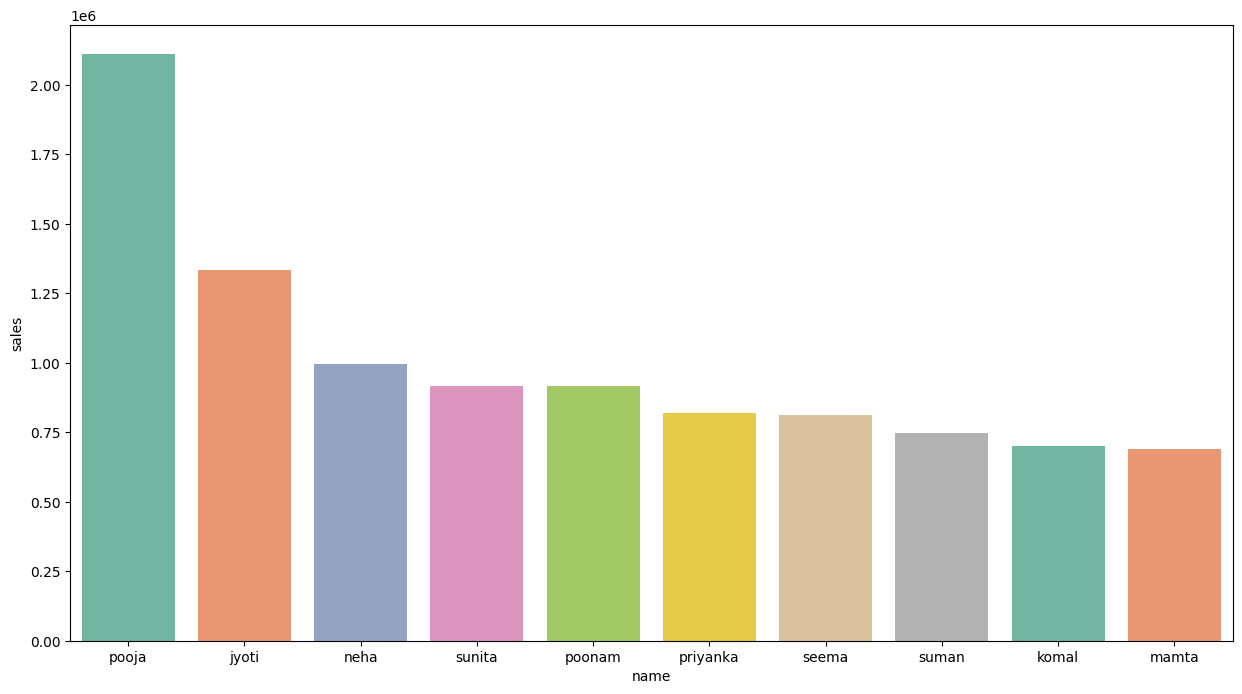

In [43]:
f=plt.figure()
f.set_figwidth(15)
f.set_figheight(8)
plots=sns.barplot(x=df_q2['name'], y =df_q2['sales'],palette="Set2" )

In [44]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.bank_name, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.trans_dim s on s.payment_key=t.payment_key " \
                "GROUP BY CUBE(s.bank_name) " \
                "ORDER BY s.bank_name "
cur.execute(select_stmt)
records = cur.fetchall()
records


successfully connected to database


[('AB Bank Limited', Decimal('2728515.50')),
 ('Bangladesh Commerce Bank Limited', Decimal('2730999.25')),
 ('Bank Asia Limited', Decimal('2687142.75')),
 ('Bengal Commercial Bank Ltd', Decimal('2704554.25')),
 ('Bkash', Decimal('2689352.50')),
 ('BRAC Bank Limited', Decimal('2705795.75')),
 ('Citizens Bank Limited', Decimal('2723215.25')),
 ('City Bank Limited', Decimal('2713952.50')),
 ('Community Bank Bangladesh Limited', Decimal('2685751.50')),
 ('Dhaka Bank Limited', Decimal('2728366.00')),
 ('Dutch-Bangla Bank Limited', Decimal('2692435.25')),
 ('Eastern Bank Limited', Decimal('2687182.25')),
 ('IFIC Bank Limited', Decimal('2699759.75')),
 ('Jamuna Bank Limited', Decimal('2689886.50')),
 ('Meghna Bank Limited', Decimal('2700528.50')),
 ('Mercantile Bank Limited', Decimal('2676578.50')),
 ('Midland Bank Limited', Decimal('2688430.25')),
 ('Modhumoti Bank Limited', Decimal('2715279.00')),
 ('Mutual Trust Bank Limited', Decimal('2670030.50')),
 ('Nagad', Decimal('2699554.50')),
 ('N

In [45]:
df_q2 = pd.DataFrame(list(records), columns=['bank_name', 'sales'])
df_q2=df_q2.dropna()
df_q2


,bank_name,sales
0,AB Bank Limited,2728515.50
1,Bangladesh Commerce Bank Limited,2730999.25
2,Bank Asia Limited,2687142.75
3,Bengal Commercial Bank Ltd,2704554.25
4,Bkash,2689352.50
5,BRAC Bank Limited,2705795.75
6,Citizens Bank Limited,2723215.25
7,City Bank Limited,2713952.50
8,Community Bank Bangladesh Limited,2685751.50
9,Dhaka Bank Limited,2728366.00


In [46]:
def changetype(x):
    x['sales']=x['sales'].astype('float64') 
df_q2

,bank_name,sales
0,AB Bank Limited,2728515.50
1,Bangladesh Commerce Bank Limited,2730999.25
2,Bank Asia Limited,2687142.75
3,Bengal Commercial Bank Ltd,2704554.25
4,Bkash,2689352.50
5,BRAC Bank Limited,2705795.75
6,Citizens Bank Limited,2723215.25
7,City Bank Limited,2713952.50
8,Community Bank Bangladesh Limited,2685751.50
9,Dhaka Bank Limited,2728366.00


In [47]:
changetype(df_q2)
df_q2

,bank_name,sales
0,AB Bank Limited,2728515.50
1,Bangladesh Commerce Bank Limited,2730999.25
2,Bank Asia Limited,2687142.75
3,Bengal Commercial Bank Ltd,2704554.25
4,Bkash,2689352.50
5,BRAC Bank Limited,2705795.75
6,Citizens Bank Limited,2723215.25
7,City Bank Limited,2713952.50
8,Community Bank Bangladesh Limited,2685751.50
9,Dhaka Bank Limited,2728366.00


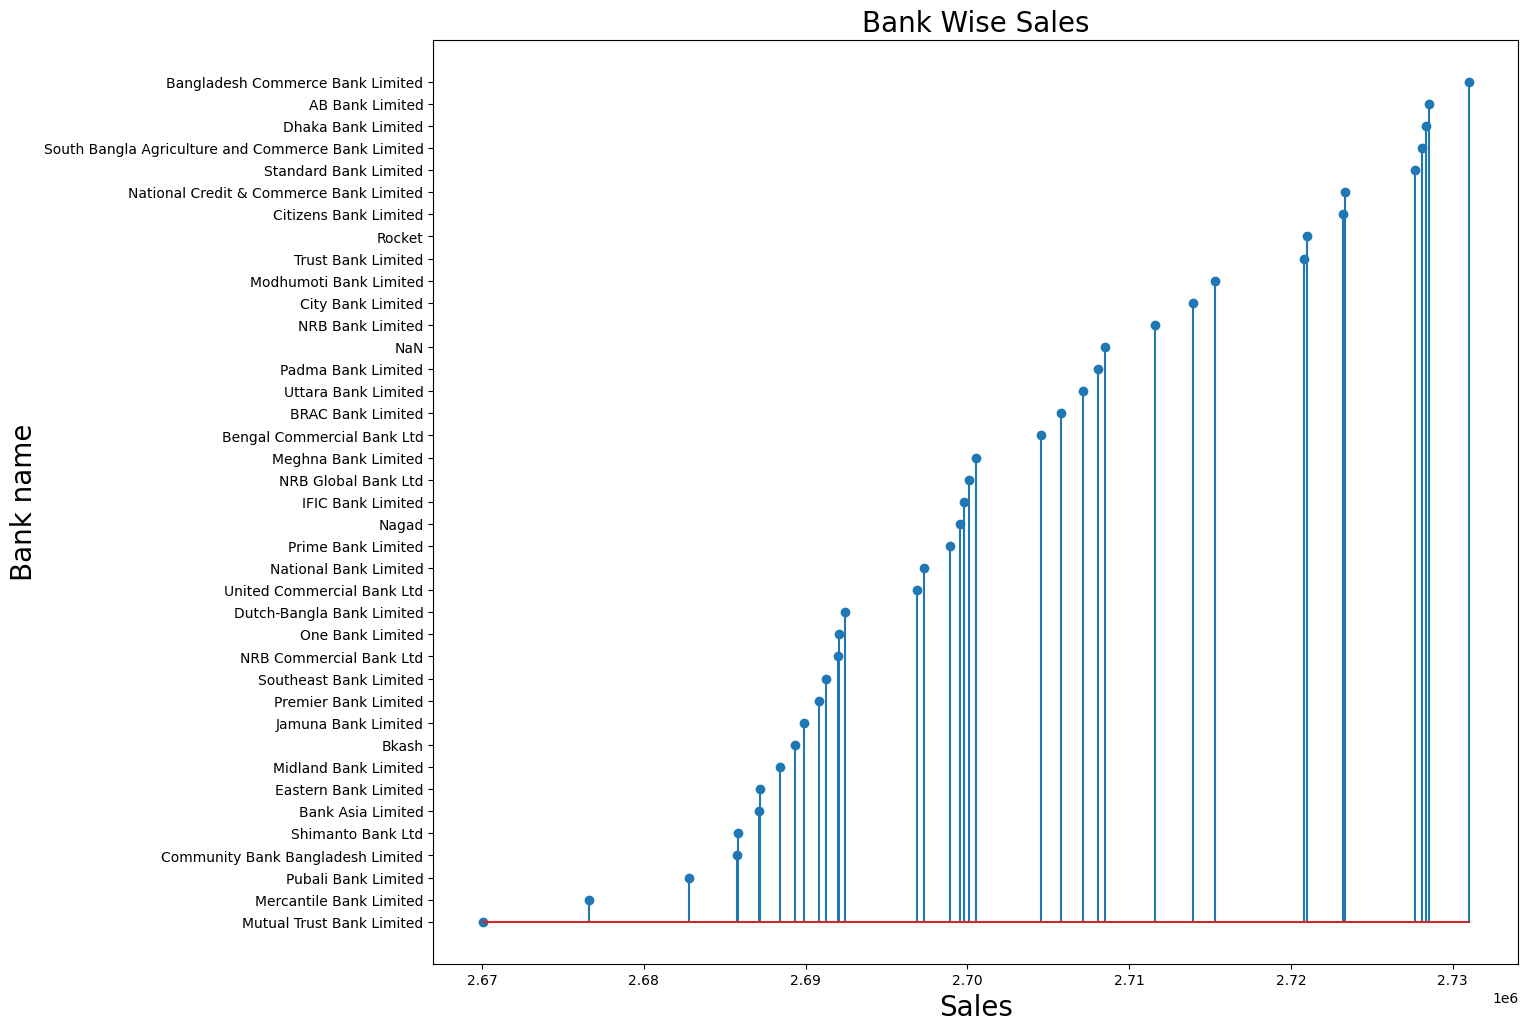

In [48]:
plt.figure(figsize= (14,12))
plt.title('Bank Wise Sales', fontsize=20)
plt.ylabel('Bank name',fontsize=20)
plt.xlabel('Sales',fontsize=20)
df_q2.sort_values(by=["sales"], inplace=True)
plt.stem(df_q2['sales'],df_q2['bank_name'])
plt.show()

In [49]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.trans_type, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.trans_dim s on s.payment_key=t.payment_key " \
                "GROUP BY CUBE(s.trans_type) " \
                "ORDER BY s.trans_type "
cur.execute(select_stmt)
records = cur.fetchall()
records


successfully connected to database


[('card', Decimal('94583038.50')),
 ('cash', Decimal('2708515.75')),
 ('mobile', Decimal('8109881.50')),
 (None, Decimal('105401435.75'))]

In [50]:
df_q2 = pd.DataFrame(list(records), columns=['trans_type', 'sales'])
df_q2=df_q2.dropna()
df_q2

,trans_type,sales
0,card,94583038.50
1,cash,2708515.75
2,mobile,8109881.50


In [51]:
def changetype(x):
    x['sales']=x['sales'].astype('float64') 

df_q2

,trans_type,sales
0,card,94583038.50
1,cash,2708515.75
2,mobile,8109881.50


In [52]:
changetype(df_q2)
df_q2

,trans_type,sales
0,card,94583038.50
1,cash,2708515.75
2,mobile,8109881.50


In [53]:
df_q2=df_q2.set_index(['trans_type'])


<Axes: ylabel='sales'>

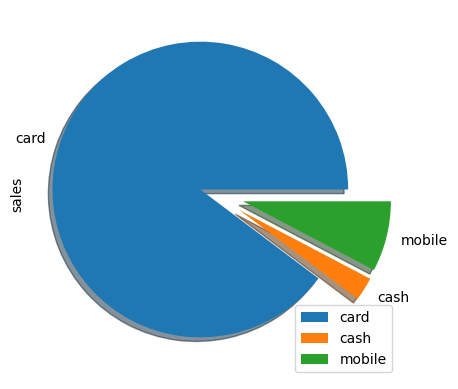

In [54]:
myexplode =[0.1,0.2,0.2]
df_q2.plot.pie(y='sales', shadow=True, explode=myexplode)

# Q3: Total sales in Barisal

In [55]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.division, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.store_dim s on s.store_key=t.store_key " \
                "WHERE s.division='BARISAL' "\
                "GROUP BY CUBE(s.division) " \
                "ORDER BY s.division "
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('BARISAL', Decimal('7520343.75')), (None, Decimal('7520343.75'))]

In [56]:
df_q3 = pd.DataFrame(list(records), columns=['division', 'sales'])
df_q3

,division,sales
0,BARISAL,7520343.75
1,None,7520343.75


In [57]:
df_q3=df_q3.drop(1)
df_q3

,division,sales
0,BARISAL,7520343.75


# Q4: Total sales in 2015

In [58]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.year, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.time_dim s on s.time_key=t.time_key " \
                "WHERE s.year='2015'"\
                "GROUP BY CUBE(s.year) " \
                "ORDER BY s.year "
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[(2015, Decimal('15095720.25')), (None, Decimal('15095720.25'))]

In [59]:
df_q4 = pd.DataFrame(list(records), columns=['year', 'sales'])
df_q4


,year,sales
0,2015.0,15095720.25
1,NaN,15095720.25


In [60]:
df_q4=df_q4.dropna()
df_q4


,year,sales
0,2015.0,15095720.25


In [61]:
def changetype(x):
    x['year']=x['year'].astype('int') 

In [62]:
df_q4

,year,sales
0,2015.0,15095720.25


In [63]:
changetype(df_q4)
df_q4

C:\Users\Cp\AppData\Local\Temp\ipykernel_17752\1777910426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['year']=x['year'].astype('int')


,year,sales
0,2015,15095720.25


# Q5: Total sales of Barisal in 2015

In [64]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.division, t.year, SUM(f.total_price) " \
              "FROM ecomdb_star_schema.fact_table f " \
              "JOIN ecomdb_star_schema.store_dim s on s.store_key=f.store_key " \
              "JOIN ecomdb_star_schema.time_dim t on t.time_key=f.time_key " \
                "WHERE s.division='BARISAL' and t.year='2015' "\
                "GROUP BY CUBE(s.division,t.year) "
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('BARISAL', 2015, Decimal('1076902.75')),
 ('BARISAL', None, Decimal('1076902.75')),
 (None, None, Decimal('1076902.75')),
 (None, 2015, Decimal('1076902.75'))]

In [65]:
df_q5 = pd.DataFrame(list(records), columns=['year','division', 'sales'])
df_q5


,year,division,sales
0,BARISAL,2015.0,1076902.75
1,BARISAL,NaN,1076902.75
2,None,NaN,1076902.75
3,None,2015.0,1076902.75


In [66]:
def changetype(x):
    x['year']=x['year'].astype('int') 
df_q5

,year,division,sales
0,BARISAL,2015.0,1076902.75
1,BARISAL,NaN,1076902.75
2,None,NaN,1076902.75
3,None,2015.0,1076902.75


In [67]:
df_q5=df_q5.dropna()
df_q5

,year,division,sales
0,BARISAL,2015.0,1076902.75


In [68]:
df_q5

,year,division,sales
0,BARISAL,2015.0,1076902.75


# Q6: For each store(item supplier), what are the top three products offered that are most often purchased?

    S1-> item1 -> quantity_sales

    S1-> item2 -> quantity_sales

    S1-> item3 -> quantity_sales

In [69]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.store_key, i.item_name, SUM(f.quantity) as quantity_sales_for_each_item " \
              "FROM ecomdb_star_schema.fact_table f " \
              "JOIN ecomdb_star_schema.store_dim s on s.store_key=f.store_key " \
              "JOIN ecomdb_star_schema.item_dim i on i.item_key=f.item_key " \
                "GROUP BY CUBE(s.store_key,i.item_name) " \
                "ORDER BY s.store_key,  SUM(f.quantity) desc"
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('S0001', None, Decimal('8169')),
 ('S0001', 'Pepsi - 12 oz cans', Decimal('92')),
 ('S0001', 'Muscle Milk Protein Shake Van. 11oz', Decimal('90')),
 ('S0001', 'Hefty Supreme Foam Plates 6 inch', Decimal('78')),
 ('S0001', 'Waterloo Sparkling Lime 12oz', Decimal('70')),
 ('S0001', 'Njoy Sugar Canister 22 oz', Decimal('69')),
 ('S0001', 'Vita Coconut Water 10oz ', Decimal('68')),
 ('S0001', 'Muscle Milk Protein Shake Strbry. 11oz', Decimal('67')),
 ('S0001', 'Sprite - 12 oz cans', Decimal('64')),
 ('S0001', 'Cheez It White Cheddar 1.5 oz', Decimal('63')),
 ('S0001', 'Sargento Bal. Breaks (fruit, nut, cheese)', Decimal('62')),
 ('S0001', 'Dixie Perfecttouch Paper Cups 12oz', Decimal('61')),
 ('S0001', 'Hershey Chocoalte Minatures Assort.', Decimal('60')),
 ('S0001', 'A&W Root Beer - 12 oz cans', Decimal('60')),
 ('S0001', 'Dark Chocolate Mint Patties', Decimal('60')),
 ('S0001', 'Nature Valley Sweet/Salty Almond Bars      ', Decimal('59')),
 ('S0001', 'Large Trash Bags Black 33 gal', De

In [70]:
df_q6 = pd.DataFrame(records, columns=['store_ID','item', 'quantity'])
df_q6

,store_ID,item,quantity
0,S0001,None,8169
1,S0001,Pepsi - 12 oz cans,92
2,S0001,Muscle Milk Protein Shake Van. 11oz,90
3,S0001,Hefty Supreme Foam Plates 6 inch,78
4,S0001,Waterloo Sparkling Lime 12oz,70
...,...,...,...
188095,None,Dole Fruit in Gel Cups 4.3 oz,21818
188096,None,La Croix Sparkling Orange 12 oz,21817
188097,None,Hershey Factory Favorites Mix,21741
188098,None,Monster Java 15 oz,21698


In [71]:
df_q6=df_q6.dropna()
df_q6


,store_ID,item,quantity
1,S0001,Pepsi - 12 oz cans,92
2,S0001,Muscle Milk Protein Shake Van. 11oz,90
3,S0001,Hefty Supreme Foam Plates 6 inch,78
4,S0001,Waterloo Sparkling Lime 12oz,70
5,S0001,Njoy Sugar Canister 22 oz,69
...,...,...,...
187835,S0099,Kind Bars Mini Variety Pack 0.7 oz,5
187836,S0099,Paper Plates 8.5 inch Ultra Strong,4
187837,S0099,Fuze Iced Tea,4
187838,S0099,Pringles Snak Stacks Variety,3


In [72]:
df_q6=df_q6.groupby('store_ID').head(3)
df_q6

,store_ID,item,quantity
1,S0001,Pepsi - 12 oz cans,92
2,S0001,Muscle Milk Protein Shake Van. 11oz,90
3,S0001,Hefty Supreme Foam Plates 6 inch,78
259,S0002,Planters Nut-trition 1.5 oz,83
260,S0002,Altoids Small Packs Variety,80
...,...,...,...
187322,S0098,Cliff Builders Protein Bar Variety Pack,84
187323,S0098,Pepsi - 12 oz cans,79
187581,S0099,Pepsi - 12 oz cans,93
187582,S0099,Diet Coke - 12 oz cans,87


# Q7: What products have been sold through card or mobile since X days?

    input: X = 5 days

    output: [item1, item2, item3, ...........]

In [74]:
x=input('Enter number of days: ')

Enter number of days: 1700


In [75]:
con = PostgresConnection().getConnection()
cur = con.cursor()

s1 = '''SELECT i.item_name
        FROM ecomdb_star_schema.fact_table f
        JOIN ecomdb_star_schema.item_dim i ON i.item_key = f.item_key 
        JOIN ecomdb_star_schema.trans_dim p ON p.payment_key = f.payment_key 
        JOIN ecomdb_star_schema.time_dim t ON t.time_key = f.time_key 
        WHERE t.date>(CURRENT_DATE::date -'
        '''

s2 = str(x)+" days'::interval) AND (p.trans_type = 'card' OR p.trans_type = 'mobile')"

select_stmt = s1 + s2
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('Paper Bowls 20 oz Ultra Strong',),
 ('Premier Protein Shake Choc. 11oz',),
 ('Brisk Lemon Iced Tea - 12 oz cans',),
 ('Breath Savers Peppermints 12/roll ',),
 ('Goldfish Pepperidge Farm Cheddar 1.5oz ',),
 ('Pure White Sugar Packets',),
 ('Cheez It White Cheddar 1.5 oz',),
 ('K Cups Hot Cocoa',),
 ('Hazelnut International Delight',),
 ('Sargento String Cheese 0.75oz',),
 ('Cliff Energy Bars Variety Pack',),
 ('Ice Breaker Mints Sugar Free ',),
 ('Sprite Zero - 12 pack',),
 ('Breath Savers Peppermints 12/roll ',),
 ('Folgers Classic Roast Coffee',),
 ('Gatorade Original Variety 12 oz',),
 ('Community Coffee Dark Roast',),
 ('Gatorade X-Factor Fierce Variety 20 oz',),
 ('Planters Nut Variety Packs',),
 ('Coke Zero Sugar 12 oz cans',),
 ('Snapple Variety Pack 20oz',),
 ('Coke Zero Sugar 12 oz cans',),
 ("Cheetos Flamin' Hot 1 oz",),
 ('Chewy Granola Variety Bars Quaker',),
 ('Red Bull Sugar Free 8.4 oz',),
 ('La Croix Sparkling Grapefruit 12 oz',),
 ("Kellogg's Cereals Assortment Pack 

# Q8: What season(quarter) is the worst for each product item? As example,

       item1-> q1

       item2-> q2

In [76]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT i.item_name,t.quarter, SUM(f.total_price) " \
              "FROM ecomdb_star_schema.fact_table f " \
              "JOIN ecomdb_star_schema.time_dim t on t.time_key=f.time_key " \
              "JOIN ecomdb_star_schema.item_dim i on i.item_key=f.item_key " \
                "GROUP BY CUBE(t.quarter,i.item_name) " \
                "ORDER BY SUM(f.total_price)"
cur.execute(select_stmt)
records = cur.fetchall()
records


successfully connected to database


[('Blue Diamond Almonds Rstd, Sltd', 'Q4', Decimal('32844.0')),
 ('Coffee-Mate Original Flavor Cold', 'Q1', Decimal('33234.0')),
 ('Blue Diamond Almonds Rstd, Sltd', 'Q3', Decimal('33882.0')),
 ('Blue Diamond Almonds Rstd, Sltd', 'Q1', Decimal('34590.0')),
 ('Coffee-Mate Original Flavor Cold', 'Q3', Decimal('35214.0')),
 ('Coffee-Mate Original Flavor Cold', 'Q4', Decimal('35346.0')),
 ('Blue Diamond Almonds Rstd, Sltd', 'Q2', Decimal('35592.0')),
 ('Cherry Coke Zero 12 pack', 'Q2', Decimal('35680.50')),
 ('Coffee-Mate Original Flavor Cold', 'Q2', Decimal('36054.0')),
 ('Diet Gingerale 12 oz cans', 'Q2', Decimal('36348.75')),
 ('Diet Gingerale 12 oz cans', 'Q1', Decimal('36409.50')),
 ('Sprite Zero - 12 pack', 'Q4', Decimal('36463.50')),
 ('Fresca Peach Citrus - 12 oz cans', 'Q4', Decimal('36612.00')),
 ('Hawaiian Punch - 12 oz cans', 'Q4', Decimal('36618.75')),
 ('Diet Gingerale 12 oz cans', 'Q4', Decimal('36753.75')),
 ('Diet Coke Caffeine Free 12oz cans', 'Q1', Decimal('36875.25')),


In [77]:
df_q8= pd.DataFrame(records, columns=['item_name','quarter','sales'])
df_q8


,item_name,quarter,sales
0,"Blue Diamond Almonds Rstd, Sltd",Q4,32844.0
1,Coffee-Mate Original Flavor Cold,Q1,33234.0
2,"Blue Diamond Almonds Rstd, Sltd",Q3,33882.0
3,"Blue Diamond Almonds Rstd, Sltd",Q1,34590.0
4,Coffee-Mate Original Flavor Cold,Q3,35214.0
...,...,...,...
1295,None,Q1,26055273.50
1296,None,Q2,26139490.25
1297,None,Q4,26506290.25
1298,None,Q3,26700381.75


In [78]:
df_q8=df_q8.dropna()
df_q8

,item_name,quarter,sales
0,"Blue Diamond Almonds Rstd, Sltd",Q4,32844.0
1,Coffee-Mate Original Flavor Cold,Q1,33234.0
2,"Blue Diamond Almonds Rstd, Sltd",Q3,33882.0
3,"Blue Diamond Almonds Rstd, Sltd",Q1,34590.0
4,Coffee-Mate Original Flavor Cold,Q3,35214.0
...,...,...,...
1100,K Cups Original Donut Shop Med. Roast,Q3,314343.0
1112,K Cups Daily Chef Columbian Supremo,Q4,321233.0
1115,Red Bull 12oz,Q2,324390.0
1116,Red Bull 12oz,Q4,325985.0


In [80]:
df_q8=df_q8.groupby('item_name').head(1)
df_q8

,item_name,quarter,sales
0,"Blue Diamond Almonds Rstd, Sltd",Q4,32844.0
1,Coffee-Mate Original Flavor Cold,Q1,33234.0
7,Cherry Coke Zero 12 pack,Q2,35680.50
9,Diet Gingerale 12 oz cans,Q2,36348.75
11,Sprite Zero - 12 pack,Q4,36463.50
...,...,...,...
1047,Muscle Milk Protein Shake Van. 11oz,Q4,253776.0
1053,K Cups Dunkin Donuts Medium Roast,Q2,260160.0
1078,K Cups Original Donut Shop Med. Roast,Q1,287790.0
1086,K Cups Daily Chef Columbian Supremo,Q3,299503.0


In [81]:
#item->q1 format
df8=df_q8
df8= df8.drop('sales', axis=1)
df8


,item_name,quarter
0,"Blue Diamond Almonds Rstd, Sltd",Q4
1,Coffee-Mate Original Flavor Cold,Q1
7,Cherry Coke Zero 12 pack,Q2
9,Diet Gingerale 12 oz cans,Q2
11,Sprite Zero - 12 pack,Q4
...,...,...
1047,Muscle Milk Protein Shake Van. 11oz,Q4
1053,K Cups Dunkin Donuts Medium Roast,Q2
1078,K Cups Original Donut Shop Med. Roast,Q1
1086,K Cups Daily Chef Columbian Supremo,Q3


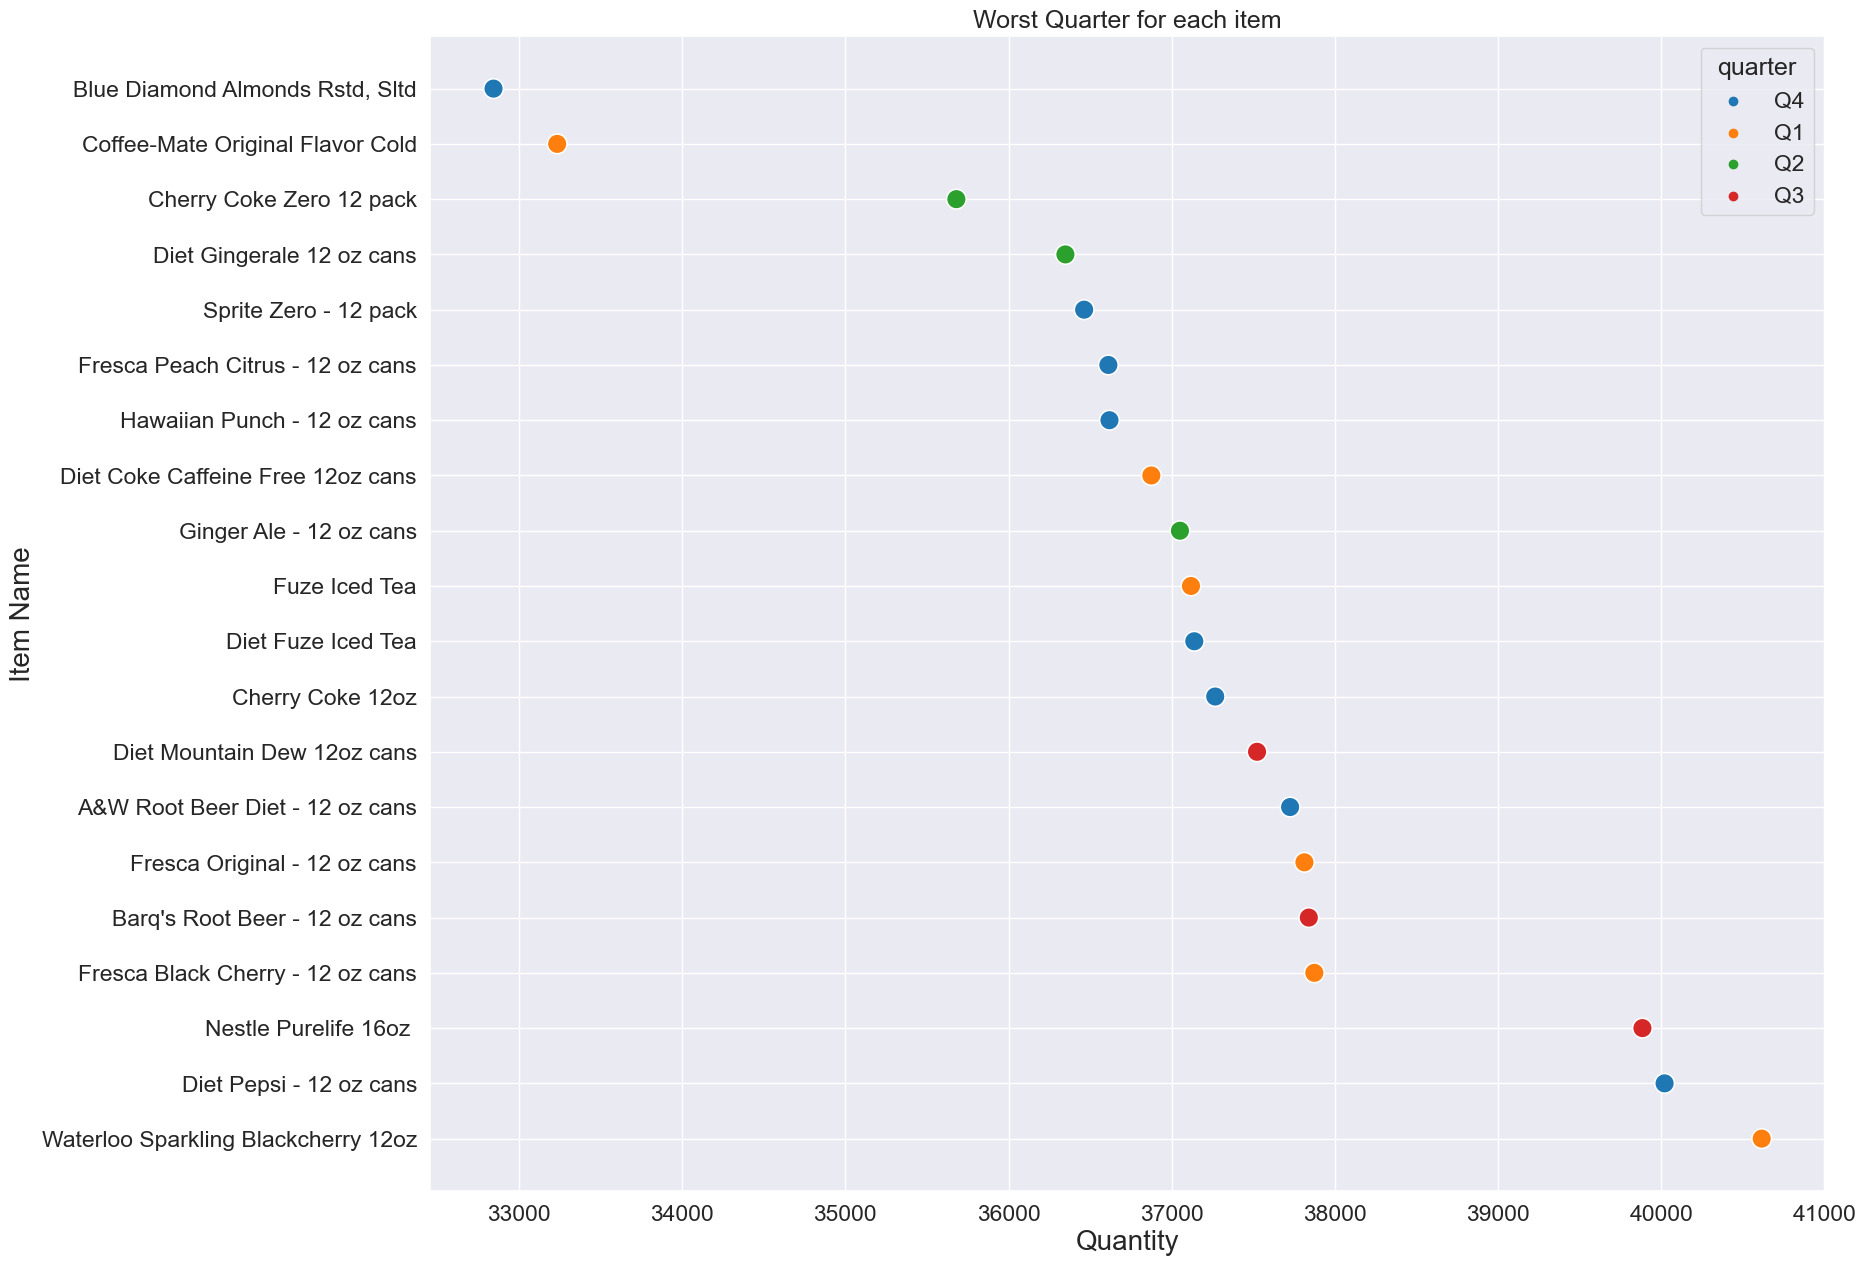

In [82]:
df=df_q8[0:20]
plt.figure(figsize=(18,15))
sns.set(font_scale = 1.5 )
plt.title('Worst Quarter for each item')
plt.ylabel('Item Name', fontsize =20)
plt.xlabel('Quantity', fontsize =20)
sns.scatterplot(data=df,x="sales", y="item_name", hue="quarter", palette="tab10",s=200)
sns.set(font_scale=1)


# Q9: Break down the total sales of items geographically (division-wise).

     item1-> division1->total_sales

     item1-> division2->total_sales



In [83]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT i.item_name,s.division, SUM(f.total_price) " \
              "FROM ecomdb_star_schema.fact_table f " \
              "JOIN ecomdb_star_schema.store_dim s on s.store_key=f.store_key " \
              "JOIN ecomdb_star_schema.item_dim i on i.item_key=f.item_key " \
                "GROUP BY CUBE(s.division,i.item_name) " \
                "ORDER BY i.item_name,s.division"
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('100% Juice Box Variety 6.75 oz ', 'BARISAL', Decimal('23790.0')),
 ('100% Juice Box Variety 6.75 oz ', 'CHITTAGONG', Decimal('64950.0')),
 ('100% Juice Box Variety 6.75 oz ', 'DHAKA', Decimal('141195.0')),
 ('100% Juice Box Variety 6.75 oz ', 'KHULNA', Decimal('37755.0')),
 ('100% Juice Box Variety 6.75 oz ', 'RAJSHAHI', Decimal('38730.0')),
 ('100% Juice Box Variety 6.75 oz ', 'RANGPUR', Decimal('26685.0')),
 ('100% Juice Box Variety 6.75 oz ', 'SYLHET', Decimal('18270.0')),
 ('100% Juice Box Variety 6.75 oz ', None, Decimal('351375.0')),
 ('A&W Root Beer - 12 oz cans', 'BARISAL', Decimal('19101.5')),
 ('A&W Root Beer - 12 oz cans', 'CHITTAGONG', Decimal('52060.5')),
 ('A&W Root Beer - 12 oz cans', 'DHAKA', Decimal('107479.0')),
 ('A&W Root Beer - 12 oz cans', 'KHULNA', Decimal('28382.0')),
 ('A&W Root Beer - 12 oz cans', 'RAJSHAHI', Decimal('27795.5')),
 ('A&W Root Beer - 12 oz cans', 'RANGPUR', Decimal('21597.0')),
 ('A&W Root Beer - 12 oz cans', 'SYLHET', Decimal('15249.0')),
 (

In [86]:
df_q9= pd.DataFrame(list(records), columns=['item', 'division', 'sales'])
df_q9


,item,division,sales
0,100% Juice Box Variety 6.75 oz,BARISAL,23790.0
1,100% Juice Box Variety 6.75 oz,CHITTAGONG,64950.0
2,100% Juice Box Variety 6.75 oz,DHAKA,141195.0
3,100% Juice Box Variety 6.75 oz,KHULNA,37755.0
4,100% Juice Box Variety 6.75 oz,RAJSHAHI,38730.0
...,...,...,...
2075,None,KHULNA,11311610.50
2076,None,RAJSHAHI,12099196.00
2077,None,RANGPUR,8429836.50
2078,None,SYLHET,5512234.25


In [87]:
df_q9=df_q9.dropna()
df_q9

,item,division,sales
0,100% Juice Box Variety 6.75 oz,BARISAL,23790.0
1,100% Juice Box Variety 6.75 oz,CHITTAGONG,64950.0
2,100% Juice Box Variety 6.75 oz,DHAKA,141195.0
3,100% Juice Box Variety 6.75 oz,KHULNA,37755.0
4,100% Juice Box Variety 6.75 oz,RAJSHAHI,38730.0
...,...,...,...
2066,Zoo Animal Cookies/Crackers,DHAKA,118286.0
2067,Zoo Animal Cookies/Crackers,KHULNA,35434.0
2068,Zoo Animal Cookies/Crackers,RAJSHAHI,37100.0
2069,Zoo Animal Cookies/Crackers,RANGPUR,25186.0


<Axes: title={'center': "Division wise items' sales"}, xlabel='sales', ylabel='item'>

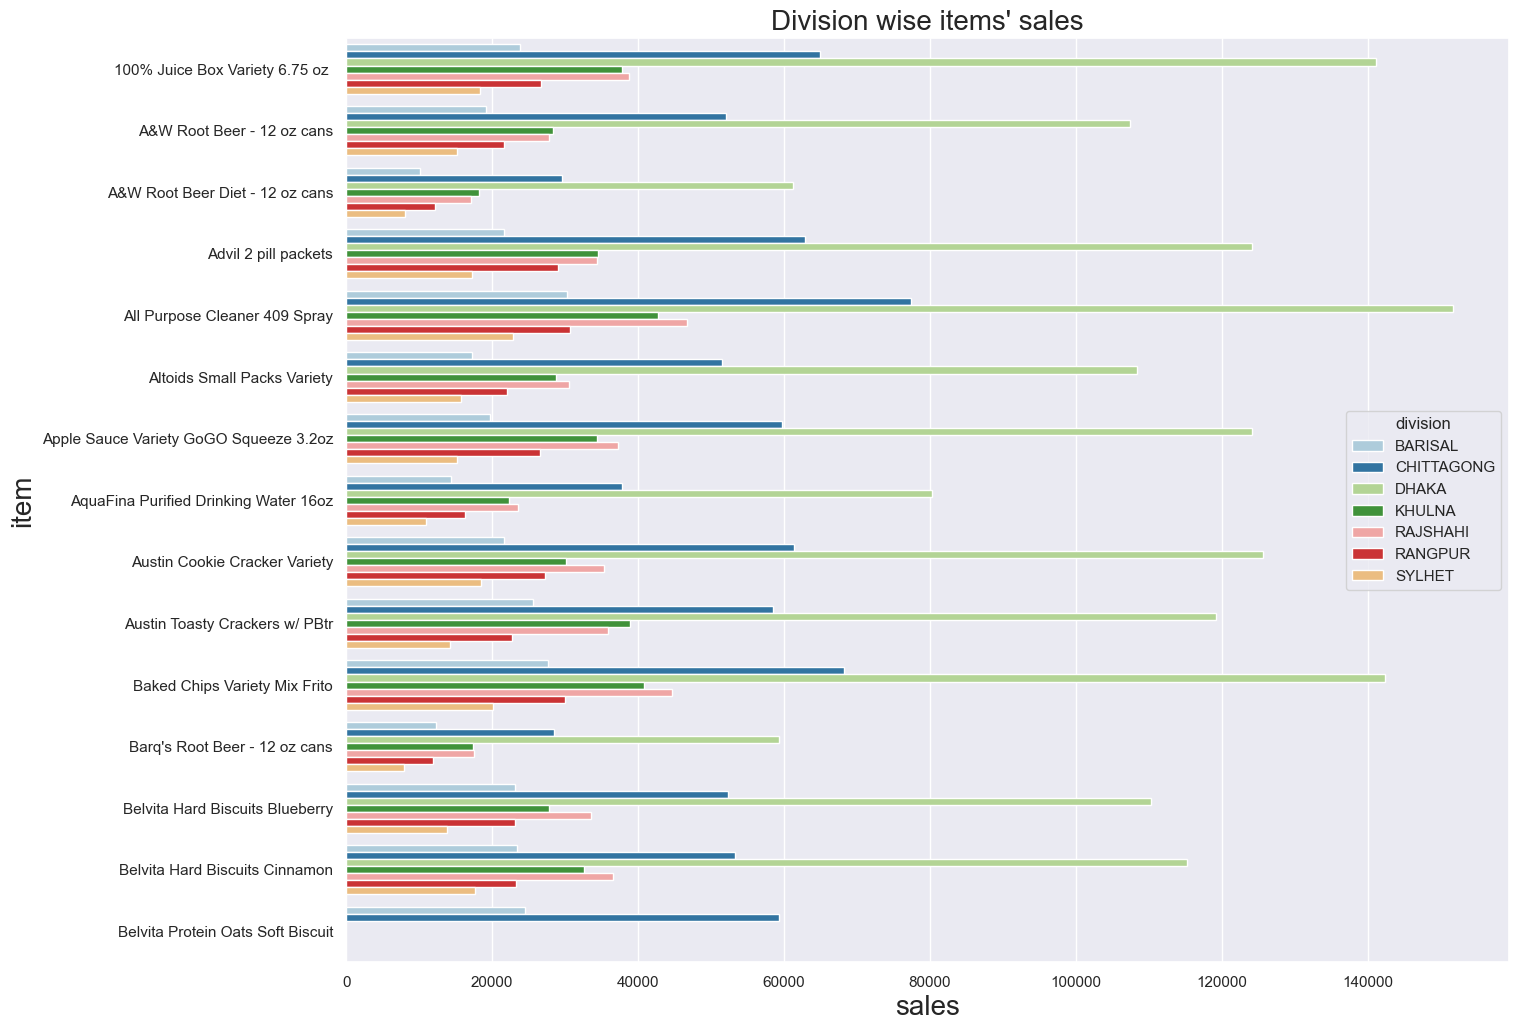

In [88]:
df_q9=df_q9[0:100]
a_dims = (15,12)
fig ,ax=plt.subplots(figsize=a_dims)
plt.title("Division wise items' sales", fontsize=20)
plt.xlabel('Item Name',fontsize=20)
plt.ylabel('Sales',fontsize=20)
sns.barplot(data=df_q9,x='sales',y='item', hue='division',ax=ax,palette='Paired')

# Q10: What are the average sales of products sales per store monthly?

     S1->M1-> avg_sales

           s1-> M2 -> avg_sales

In [89]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.store_key, t.month, AVG(f.total_price) " \
              "FROM ecomdb_star_schema.fact_table f " \
              "JOIN ecomdb_star_schema.store_dim s on s.store_key=f.store_key " \
              "JOIN ecomdb_star_schema.time_dim t on t.time_key=f.time_key " \
                "GROUP BY CUBE(s.store_key,t.month) " \
                "ORDER BY s.store_key, t.month"
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('S0001', 1, Decimal('97.7543103448275862')),
 ('S0001', 2, Decimal('100.5776699029126214')),
 ('S0001', 3, Decimal('109.4158878504672897')),
 ('S0001', 4, Decimal('98.8805309734513274')),
 ('S0001', 5, Decimal('99.5245535714285714')),
 ('S0001', 6, Decimal('101.2459349593495935')),
 ('S0001', 7, Decimal('103.9189189189189189')),
 ('S0001', 8, Decimal('105.1269531250000000')),
 ('S0001', 9, Decimal('96.1901041666666667')),
 ('S0001', 10, Decimal('104.6166666666666667')),
 ('S0001', 11, Decimal('103.8355855855855856')),
 ('S0001', 12, Decimal('107.8697478991596639')),
 ('S0001', None, Decimal('102.5407569141193595')),
 ('S0002', 1, Decimal('98.2902684563758389')),
 ('S0002', 2, Decimal('106.3849557522123894')),
 ('S0002', 3, Decimal('102.7565217391304348')),
 ('S0002', 4, Decimal('104.0798969072164948')),
 ('S0002', 5, Decimal('109.1587591240875912')),
 ('S0002', 6, Decimal('100.9268867924528302')),
 ('S0002', 7, Decimal('95.6513157894736842')),
 ('S0002', 8, Decimal('108.9462809917355

In [90]:
df_q10 = pd.DataFrame(list(records), columns=['store_ID','month' ,'average_sales'])
df_q10

,store_ID,month,average_sales
0,S0001,1.0,97.7543103448275862
1,S0001,2.0,100.5776699029126214
2,S0001,3.0,109.4158878504672897
3,S0001,4.0,98.8805309734513274
4,S0001,5.0,99.5245535714285714
...,...,...,...
9446,None,9.0,105.4656137424143517
9447,None,10.0,105.5257301519569495
9448,None,11.0,105.9146828059985602
9449,None,12.0,105.6896222951285665


<Axes: xlabel='month', ylabel='average_sales'>

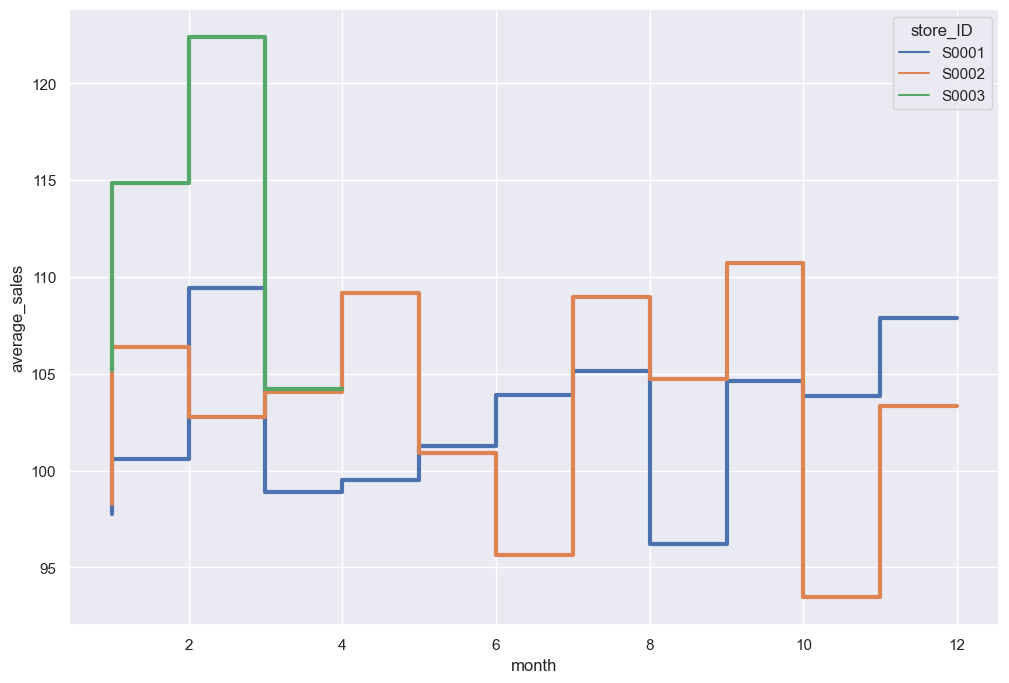

In [91]:
df_q10 = df_q10[0:30]
a_dims = (12, 8)
fig, ax = plt.subplots(figsize=a_dims)
sns.lineplot(x='month', y='average_sales', data=df_q10, drawstyle='steps-pre', hue='store_ID', linewidth=3, ax=ax)
